# LSTM

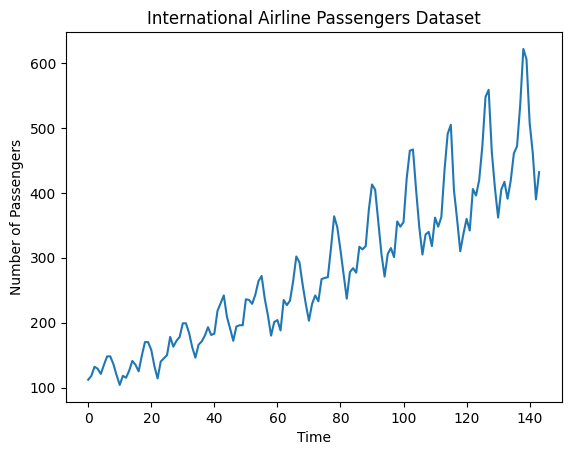

Train size: 108, Test size: 36


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0526
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0096
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060
Epoch 11/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035
Epoch 12/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047
Epoch 13/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044
Epoch 14/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0047
Epoch 15/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 16/50
97/97 ━

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,555 (9.98 KB)

 Trainable params: 851 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,704 (6.66 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Train RMSE: 21.62
Test RMSE: 41.47


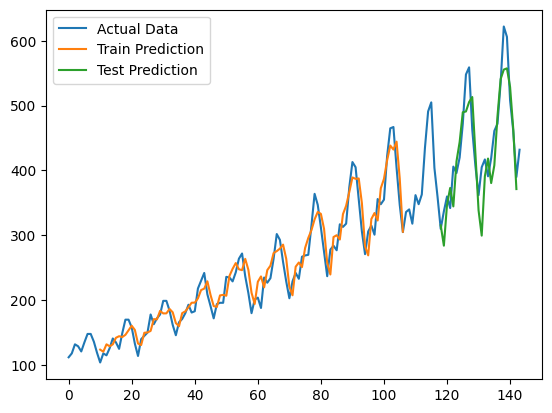

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

dataset = data['Passengers'].values

plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers Dataset")
plt.show()

dataset = dataset.reshape(-1, 1).astype("float32")

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.75)
train = dataset[:train_size]
test = dataset[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

time_stamp = 10

def create_dataset(data, time_stamp):
    X, Y = [], []
    for i in range(len(data) - time_stamp - 1):
        X.append(data[i:(i + time_stamp), 0])
        Y.append(data[i + time_stamp, 0])
    return np.array(X), np.array(Y)

trainX, trainY = create_dataset(train, time_stamp)
testX, testY = create_dataset(test, time_stamp)

trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stamp)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=1)

model.summary()

plot_model(model, to_file='lstm_model.png', show_shapes=True)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1, 1))

trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
testScore = math.sqrt(mean_squared_error(testY, testPredict))

print(f"Train RMSE: {trainScore:.2f}")
print(f"Test RMSE: {testScore:.2f}")

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[time_stamp:len(trainPredict) + time_stamp] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict) + (time_stamp * 2) + 1:len(dataset) - 1] = testPredict

plt.plot(scaler.inverse_transform(dataset), label="Actual Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.legend()
plt.show()
